<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [23]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [18]:
# Your code here
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np

Download the webpage at the url


In [22]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [25]:
#your code goes here
soup = BeautifulSoup(data, 'html.parser')

Scrape the `Language name` and `annual average salary`.


In [26]:
#your code goes here
table = soup.find('table')

Save the scrapped data into a file named *popular-languages.csv*


In [27]:
# your code goes here
language_list = []
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() # store the value in column 3 as language_name
    salary = cols[3].getText() # store the value in column 4 as annual_average_salary
    language_list.append([language,salary])

# convert to dataframe:
df_lang = pd.DataFrame(language_list, columns=['Language','Average Annual Salary']) 

# save as csv:
filename = "popular-languages.csv"
df_lang.to_csv(filename)

# now print out the file:
df = pd.read_csv(filename, header=1) 
df

,0,Language,Average Annual Salary
0,1,Python,"$114,383"
1,2,Java,"$101,013"
2,3,R,"$92,037"
3,4,Javascript,"$110,981"
4,5,Swift,"$130,801"
5,6,C++,"$113,865"
6,7,C#,"$88,726"
7,8,PHP,"$84,727"
8,9,SQL,"$84,793"
9,10,Go,"$94,082"


In [28]:
#step 1 - clean data
df['Average Annual Salary'].replace('[\$,]', '', regex=True, inplace=True)
df['Average Annual Salary'] = df['Average Annual Salary'].astype(float)
df.sort_values('Average Annual Salary', ascending=True, inplace=True)
#del df['0']
df = df.set_index('Language')
df

,0,Average Annual Salary
Language,,
PHP,8,84727.0
SQL,9,84793.0
C#,7,88726.0
R,3,92037.0
Go,10,94082.0
Java,2,101013.0
Javascript,4,110981.0
C++,6,113865.0
Python,1,114383.0


NameError: name 'plt' is not defined

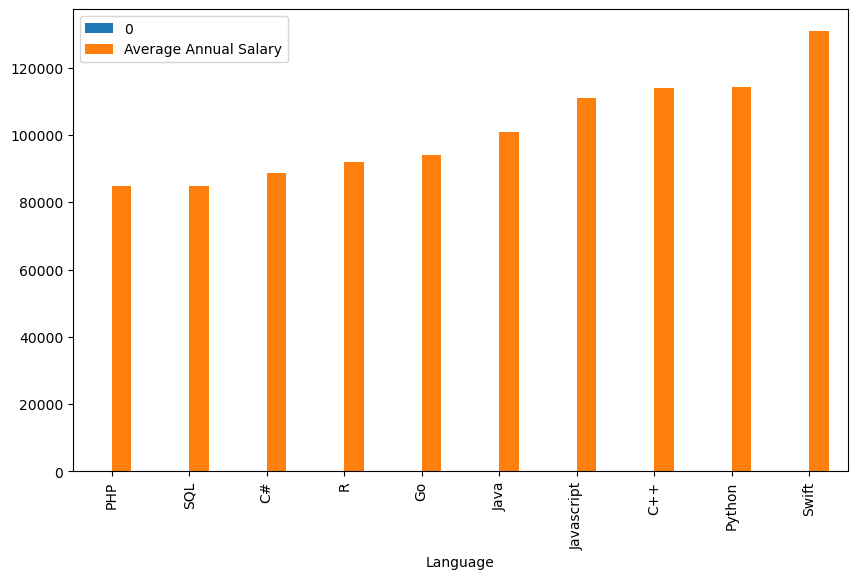

In [30]:
# step 2: plot data
df.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Average Annual Salary') # add to x-label to the plot
plt.ylabel('Programming Language') # add y-label to the plot
plt.title('Average Annual Salary by Progamming Language') # add title to the plot

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
